В качестве итогового проекта вам предлагается решить задачу классификации на наборе данных Fashion-MNIST, который вы можете скачать по следующей ссылке

https://www.kaggle.com/zalando-research/fashionmnist

Данные проект является учебным и его цель – научиться работать с различными моделями машинного обучения. Вам необязательно строить самую лучшую модель и получать лучшее качество на тестовых данных. Самое важное – это научиться обучать модели и анализировать полученные результаты. В результате, вы научитесь использовать и подготавливать данные для решения задачи классификации. Так же вы изучите на практике различные алгоритмы машиного обучения, такие как логистическая регрессия, полносвязные нейронные сети и сверточные нейронные сети. Более того, вы научитесь обучать эти модели и анализировать результаты работы этих алгоритмов на новых данных

Fashion-MNIST – это датасет состоящий из 70000 черно-белых изображений одежды 28х28 пикселей каждое. 60000 из них содержатся в тренировочной выборке, и 10000 – в тестовой. Этот набор данных представляет из себя альтернативу обычному датасету рукописных цифр MNIST. Существовало несколько предпосылок для создания такого набора данных.

Большинство исследователей в области машинного и глубинного обучения используют MNIST при первой проверки своих моделей, что не всегда является хорошей идеей. Если какая-то модель не работает на датасете MNIST – это не значит, что она не работает в принципе. Если какая-то модель прекрасно работает на датасете MNIST – это не означает, что она так же хорошо будет работать на других датасетах. Известны случаи в отказе публикации некоторых статей из-за недостаточно хорошего качества модели на MNIST. Поэтому Zalando Research предложили альтернативу.

В Fashion-MNIST содержится 10 классов разной одежды по аналогии с 10 цифрами из MNIST. Подробное описание датасета можно найти здесь
https://www.kaggle.com/zalando-research/fashionmnist/home

## Review criteria

В данном задании будет проверено, что была обучена каждая модель, которая упоминается в условии.

Также будет проверены проведения сравнений качеств различных моделей.

In [1]:
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

random.seed(123)
np.random.seed(123)

%matplotlib inline

In [2]:
import tensorflow as tf
tf.random.set_seed(123)

## Загрузка данных

Перед решением задачи классификации на приведенном наборе данных предлагается нормализовать данные. Датасет доступен для скачивания в формате CSV. В данном случае удобно использовать библиотеку Pandas для загрузки данных.

In [3]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

In [4]:
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

<b>1. Логистическая регрессия</b>

Для решения задачи классификации предлагается начать с использования логистической регрессии. В данном случае, количество признаков равно 28x28=784, так же мы имеем 60000 объектов в тренировочной выборке. Поэтому рекомендуется использовать tensorflow или keras для выполнения этого задания. Используйте стохастический градиентный спуск (stochastic gradient descent) в качестве алгоритма оптимизации.

По своей сути, логистическая регрессия может быть реализована как нейронная сеть без скрытых слоев. В выходном слое содержится количество нейронов, равное количеству классов. В качестве функции активации выходного слоя следует использовать softmax.

Обучите логистическую регрессию на тренировочной выборке и оцените качество на тестовой выборке используя метрику accuracy. Постройте график качества модели на валидационной выборке от количества эпох. Для этого вы можете использовать утилиту tensorboard.

tensorboard в tensorflow - https://www.tensorflow.org/guide/summaries_and_tensorboard

tensorboard в keras - https://keras.io/callbacks/#tensorboard

In [5]:
model_reg = tf.keras.models.Sequential()
model_reg.add(tf.keras.layers.Dense(10, activation='softmax'))

In [6]:
model_reg.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

In [7]:
reg = model_reg.fit(x_train, 
                    y_train, 
                    epochs=10, 
                    verbose=0,
                    validation_data=(x_test, y_test),
                    shuffle=False)

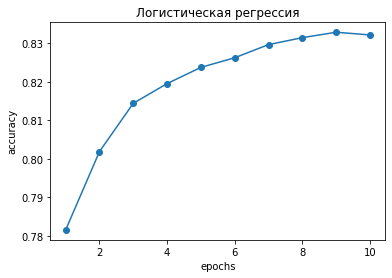

In [8]:
plt.title('Логистическая регрессия')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.plot(range(1, 11), reg.history['val_accuracy'], marker='o')

<b>2. Полносвязная нейронная сеть</b>

Далее, попробуйте реализовать полносвязную нейронную сеть с несколькими скрытыми слоями. Обучите модель и посчитайте качество на тестовой выборке. Как оно изменилось в сравнении с логистической регрессией? Как вы можете объяснить этот результат?

In [9]:
model_nn = tf.keras.models.Sequential()
model_nn.add(tf.keras.layers.Dense(50, activation='relu', input_shape=(784,)))
model_nn.add(tf.keras.layers.Dropout(0.2))
model_nn.add(tf.keras.layers.Dense(100, activation='relu'))
model_nn.add(tf.keras.layers.Dense(10, activation='softmax'))

In [10]:
model_nn.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

In [11]:
nn = model_nn.fit(x_train, 
             y_train, 
             epochs=10, 
             verbose=0, 
             validation_data=(x_test, y_test))

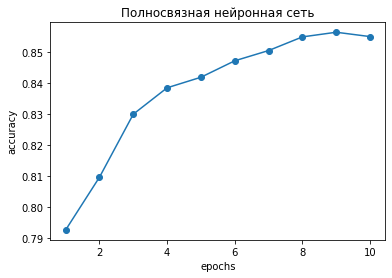

In [12]:
plt.title('Полносвязная нейронная сеть')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.plot(range(1, 11), nn.history['val_accuracy'], marker='o')

<BarContainer object of 2 artists>

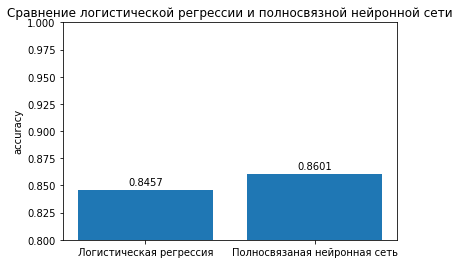

In [13]:
name = ['Логистическая регрессия', 'Полносвязаная нейронная сеть']
values = [round(max(reg.history['accuracy']), 4), round(max(nn.history['accuracy']), 4)]

plt.title('Сравнение логистической регрессии и полносвязной нейронной сети')
plt.ylabel('accuracy')
plt.ylim(0.8)
for i, j in enumerate(values):
    plt.annotate(j, (i, j+0.005), horizontalalignment='center')
plt.bar(x=name, 
        height=values)

<i>На графике представлено сравнение качества логистической регрессии и полносвязной нейронной сети. Нейронная сеть показала большую точность в связи с увеличенным количеством слоев</i>

<b>3. Сверточная нейронная сеть</b>

После этого вам предлагается реализовать сверточную нейронную сеть. В данном случае лучше использовать готовые слои, которые предоставляют keras или tensorflow.

Начните с модели с несколькими сверточными слоями. Так же рекомендуется использовать слои суб-дискретизации, например Max Pooling слои. Они понижают размерность сходных данных и выделяют наиболее важные признаки из данных. Посчитайте качество получившейся модели на тестовой выборке. Сравните полученные результаты с результатами полносвязной нейронной сети.

In [14]:
x_train = x_train.reshape(60000, 28, 28, 1)
x_test = x_test.reshape(10000, 28, 28, 1)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

In [15]:
model_cnn = tf.keras.models.Sequential()
model_cnn.add(tf.keras.layers.Input(shape=(28, 28, 1)))
model_cnn.add(tf.keras.layers.Convolution2D(filters=32, kernel_size=(3, 3), activation='relu'))
model_cnn.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
model_cnn.add(tf.keras.layers.Flatten())
model_cnn.add(tf.keras.layers.Dense(64, activation='relu'))
model_cnn.add(tf.keras.layers.Dense(10, activation='softmax'))

In [16]:
model_cnn.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

In [17]:
cnn = model_cnn.fit(x_train, 
              y_train, 
              epochs=10, 
              verbose=0, 
              validation_data=(x_test, y_test))

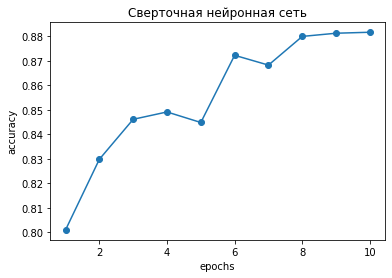

In [18]:
plt.title('Сверточная нейронная сеть')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.plot(range(1, 11), cnn.history['val_accuracy'], marker='o')

<BarContainer object of 2 artists>

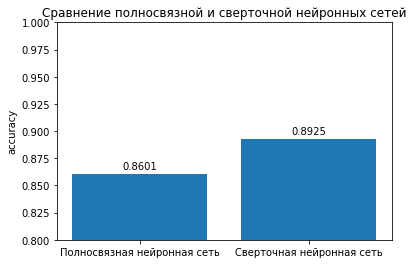

In [19]:
name = ['Полносвязная нейронная сеть', 'Сверточная нейронная сеть']
values = [round(max(nn.history['accuracy']), 4), round(max(cnn.history['accuracy']), 4)]

plt.title('Сравнение полносвязной и сверточной нейронных сетей')
plt.ylabel('accuracy')
plt.ylim(0.8)
for i, j in enumerate(values):
    plt.annotate(j, (i, j+0.005), horizontalalignment='center')
plt.bar(x=name, 
        height=values)

<i>Сверточная нейронная сеть показывает лучше результаты за счет формирования выходной карты признаков</i>

Далее, попробуйте увеличить количество слоев в вашей нейронной сети. Достаточно добавить несколько новых сверточных слоев. Проанализируете, как изменилось качество в этом случае.

In [25]:
model_cnn2 = tf.keras.models.Sequential()
model_cnn2.add(tf.keras.layers.Input(shape=(28, 28, 1)))
model_cnn2.add(tf.keras.layers.Convolution2D(filters=32, kernel_size=(3, 3), activation='relu'))
model_cnn2.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
model_cnn2.add(tf.keras.layers.Convolution2D(filters=64, kernel_size=(3, 3), activation='relu'))
model_cnn2.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
model_cnn2.add(tf.keras.layers.Flatten())
model_cnn2.add(tf.keras.layers.Dense(64, activation='relu'))
model_cnn2.add(tf.keras.layers.Dense(10, activation='softmax'))

In [21]:
model_cnn2.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

In [22]:
cnn2 = model_cnn2.fit(x_train, 
              y_train, 
              epochs=10, 
              verbose=0, 
              validation_data=(x_test, y_test))

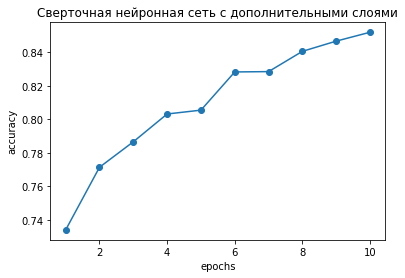

In [26]:
plt.title('Сверточная нейронная сеть с дополнительными слоями')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.plot(range(1, 11), cnn2.history['val_accuracy'], marker='o')

<BarContainer object of 2 artists>

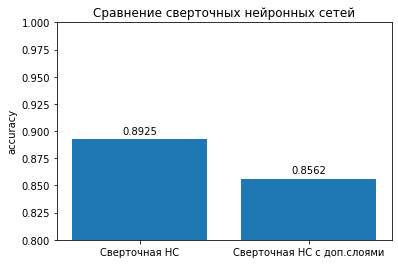

In [29]:
name = ['Сверточная НС', 'Сверточная НС с доп.слоями']
values = [round(max(cnn.history['accuracy']), 4), round(max(cnn2.history['accuracy']), 4)]

plt.title('Сравнение сверточных нейронных сетей')
plt.ylabel('accuracy')
plt.ylim(0.8)
for i, j in enumerate(values):
    plt.annotate(j, (i, j+0.005), horizontalalignment='center')
plt.bar(x=name, 
        height=values)

<i>Сверточная нейронная сеть с дополнительным сверточным слоем показала результат хуже. Это можно объяснить тем, что модель переобучилась на тренировочных данных</i>

В заключение, рекомендуется попробовать добавить Batch Normalization слои. Обычно они располагаются после сверточных слоев или слоев полносвязной нейронной сети. Обычно они улучшают качество модели, этим объясняется их популярность использования в современных архитектурах нейронных сетей. Однако, это требует проверки для конкретной модели и конкретного набора данных.

In [32]:
model_cnn3 = tf.keras.models.Sequential()
model_cnn3.add(tf.keras.layers.Input(shape=(28, 28, 1)))
model_cnn3.add(tf.keras.layers.Convolution2D(filters=32, kernel_size=(3, 3), activation='relu'))
model_cnn3.add(tf.keras.layers.BatchNormalization(axis=-1, momentum=0.99, epsilon=0.001))
model_cnn3.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
model_cnn3.add(tf.keras.layers.Convolution2D(filters=64, kernel_size=(3, 3), activation='relu'))
model_cnn3.add(tf.keras.layers.BatchNormalization(axis=-1, momentum=0.99, epsilon=0.001))
model_cnn3.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
model_cnn3.add(tf.keras.layers.Flatten())
model_cnn3.add(tf.keras.layers.Dense(64, activation='relu'))
model_cnn3.add(tf.keras.layers.Dense(10, activation='softmax'))

In [33]:
model_cnn3.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

In [34]:
cnn3 = model_cnn3.fit(x_train, 
              y_train, 
              epochs=10, 
              verbose=0, 
              validation_data=(x_test, y_test))

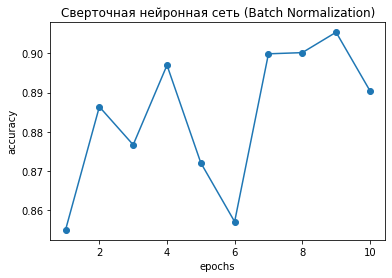

In [37]:
plt.title('Сверточная нейронная сеть (Batch Normalization)')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.plot(range(1, 11), cnn3.history['val_accuracy'], marker='o')

<BarContainer object of 2 artists>

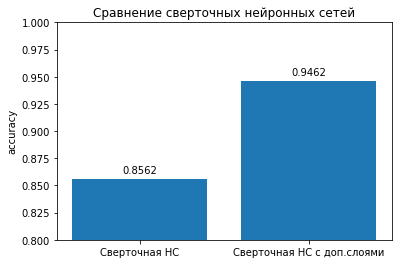

In [36]:
name = ['Сверточная НС', 'Сверточная НС с доп.слоями']
values = [round(max(cnn2.history['accuracy']), 4), round(max(cnn3.history['accuracy']), 4)]

plt.title('Сравнение сверточных нейронных сетей')
plt.ylabel('accuracy')
plt.ylim(0.8)
for i, j in enumerate(values):
    plt.annotate(j, (i, j+0.005), horizontalalignment='center')
plt.bar(x=name, 
        height=values)

<i>Используя Batch Normalization слои, удалось добиться лучшего качества. Предположительно это произошло в связи повышением производительности и стабилизации работы искусственных нейронных сетей. Суть данного метода заключается в том, что некоторым слоям нейронной сети на вход подаются данные, предварительно обработанные и имеющие нулевое математическое ожидание и единичную дисперсию.</i>

## Ответ

В качестве решения приложите архив, содержащий файл решения и все используемые для его работы файлы.Постройте график качества модели на валидационной выборке от количества эпох. Для этого вы можете использовать утилиту tensorboard.